# <div style="color: DarkCyan">Case Study IV: IMDb Movie Reviews</div>

**Business case:** We want to predict the review score of new movies.

**Data source:** <a target="_blank" href="https://www.imdb.com/interfaces/">IMDb datasets</a>

In [1]:
%run ./utils

In [2]:
import pandas as pd
import numpy as np

## Extract the data from RDS

In [3]:
# Create connection object
from sqlalchemy import create_engine

# WARNING: THE FOLLOWING 3 CELLS ASSUME A DATABASE RUNNING IN MY AWS ACCOUNT FROM WHICH THE DATA CAN BE EXTRACTED.
# THE DATABASE WAS AVAILABLE DURING THE WORKSHOPS BUT THEN SHUTDOWN TO AVOID CHARGES.
# TO RUN THE NOTEBOOK, EITHER IGNORE THE DB LOADING CELLS AND RUN THE COMMENTED OUT CELL BELOW OR CONTACT ME
# TO REPROVISION THE DATABASE.
database_address = 'terraform-20180408040339276100000001.c5m5jo60psys.us-west-2.rds.amazonaws.com'
connection = create_engine('postgresql://marios:bigdataexpert@{}:5432/postgres'.format(database_address))

# List tables
tables = pd.read_sql(
    "select table_name from information_schema.tables where table_schema = 'public'", 
    connection)['table_name'].tolist()
tables

In [ ]:
# List table sizes
# If some table are huge, we don't want to load them in memory
for table in tables:
    print(pd.read_sql(
        "select name '{0}', count(*) from {0}".format(table), 
        connection).iloc[0].tolist())

In [ ]:
df_tables = [
    pd.read_sql("select * from {}".format(table), connection)
    for table in tables]

In [12]:
# ALTERNATIVE WAY, LOAD DATA FROM S3 BUCKET LINKS

# df_tables = [pd.read_csv(url, sep='\t') for url in [
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_akas.tsv',
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_c_movies_crew.tsv',
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_ratings.tsv',
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_crew_basics.tsv',
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_principals.tsv',
#     'https://s3-us-west-2.amazonaws.com/big-data-expert-ii-data/imdb/small_movie_basics.tsv'
# ]]

In [13]:
for table, df in zip(tables, df_tables):
    print(table)
    display_pandas(df.head())
    print('\n')

         titleId  ordering  \
0      tt0000001  3          
1      tt0000002  4          
2      tt0000005  1          
3      tt0000005  4          
4      tt0000005  5          
5      tt0000005  7          
6      tt0000007  1          
7      tt0000007  4          
8      tt0000007  5          
9      tt0000008  2          
10     tt0000008  3          
11     tt0000010  5          
12     tt0000010  7          
13     tt0000012  3          
14     tt0000013  8          
15     tt0000014  13         
16     tt0000014  1          
17     tt0000014  2          
18     tt0000015  3          
19     tt0000022  1          
20     tt0000022  5          
21     tt0000023  3          
22     tt0000026  5          
23     tt0000027  1          
24     tt0000028  5          
25     tt0000029  15         
26     tt0000029  1          
27     tt0000029  2          
28     tt0000031  6          
29     tt0000033  5          
30     tt0000036  1          
31     tt0000038  1          
32     tt0

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,3,Carmencita,US,\N,\N,\N,0.0
1,tt0000002,4,The Clown and His Dogs,US,\N,\N,literal English title,0.0
2,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0.0
3,tt0000005,4,Blacksmith Scene #1,US,\N,alternative,\N,0.0
4,tt0000005,5,Blacksmithing,US,\N,\N,informal alternative title,0.0




          tconst                                                    directors  \
0      tt0000001  nm0005690                                                     
1      tt0000002  nm0721526                                                     
2      tt0000005  nm0005690                                                     
3      tt0000007  nm0005690,nm0374658                                           
4      tt0000008  nm0005690                                                     
5      tt0000010  nm0525910                                                     
6      tt0000012  nm0525908,nm0525910                                           
7      tt0000013  nm0525910                                                     
8      tt0000014  nm0525910                                                     
9      tt0000015  nm0721526                                                     
10     tt0000022  nm0525910                                                     
11     tt0000023  nm052591

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000005,nm0005690,\N
3,tt0000007,"nm0005690,nm0374658",\N
4,tt0000008,nm0005690,\N




          tconst  averageRating  numVotes
0      tt0000001  5.8            1345    
1      tt0000002  6.5            156     
2      tt0000005  6.2            1611    
3      tt0000007  5.5            538     
4      tt0000008  5.6            1433    
5      tt0000010  6.9            4811    
6      tt0000012  7.4            7926    
7      tt0000013  5.7            1221    
8      tt0000014  7.2            3471    
9      tt0000015  6.2            596     
10     tt0000022  5.1            691     
11     tt0000023  5.7            855     
12     tt0000026  5.7            1070    
13     tt0000027  5.6            714     
14     tt0000028  5.2            655     
15     tt0000029  5.9            2294    
16     tt0000031  5.6            639     
17     tt0000033  5.6            678     
18     tt0000036  4.5            390     
19     tt0000038  4.4            115     
20     tt0000041  6.7            1111    
21     tt0000069  4.8            247     
22     tt0000070  6.4           

,tconst,averageRating,numVotes
0,tt0000001,5.8,1345
1,tt0000002,6.5,156
2,tt0000005,6.2,1611
3,tt0000007,5.5,538
4,tt0000008,5.6,1433




           nconst             primaryName birthYear deathYear  \
0       nm0000001  Fred Astaire            1899.0    1987.0     
1       nm0000002  Lauren Bacall           1924.0    2014.0     
2       nm0000003  Brigitte Bardot         1934.0    \N         
3       nm0000004  John Belushi            1949.0    1982.0     
4       nm0000005  Ingmar Bergman          1918.0    2007.0     
5       nm0000006  Ingrid Bergman          1915.0    1982.0     
6       nm0000007  Humphrey Bogart         1899.0    1957.0     
7       nm0000008  Marlon Brando           1924.0    2004.0     
8       nm0000009  Richard Burton          1925.0    1984.0     
9       nm0000010  James Cagney            1899.0    1986.0     
10      nm0000011  Gary Cooper             1901.0    1961.0     
11      nm0000012  Bette Davis             1908.0    1989.0     
12      nm0000013  Doris Day               1922.0    \N         
13      nm0000014  Olivia de Havilland     1916.0    \N         
14      nm0000015  Jame

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0043044,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0040506,tt0037382"
2,nm0000003,Brigitte Bardot,1934.0,\N,"actress,soundtrack,producer","tt0049189,tt0063715,tt0059956,tt0057345"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,soundtrack","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0060827,tt0083922,tt0050976"




          tconst  \
0      tt0000001   
1      tt0000002   
2      tt0000005   
3      tt0000007   
4      tt0000008   
5      tt0000010   
6      tt0000012   
7      tt0000013   
8      tt0000014   
9      tt0000015   
10     tt0000022   
11     tt0000023   
12     tt0000026   
13     tt0000027   
14     tt0000028   
15     tt0000029   
16     tt0000031   
17     tt0000033   
18     tt0000036   
19     tt0000038   
20     tt0000041   
21     tt0000069   
22     tt0000070   
23     tt0000075   
24     tt0000076   
25     tt0000091   
26     tt0000108   
27     tt0000109   
28     tt0000110   
29     tt0000111   
30     tt0000112   
31     tt0000113   
32     tt0000138   
33     tt0000147   
34     tt0000177   
35     tt0000184   
36     tt0000192   
37     tt0000208   
38     tt0000211   
39     tt0000228   
40     tt0000230   
41     tt0000235   
42     tt0000242   
43     tt0000246   
44     tt0000247   
45     tt0000248   
46     tt0000256   
47     tt0000264   
48     tt0000272  

,tconst,principalCast
0,tt0000001,"nm1588970,nm0005690,nm0374658"
1,tt0000002,"nm0721526,nm1335271"
2,tt0000005,"nm0005690,nm0443482,nm0653042"
3,tt0000007,"nm0179163,nm0183947,nm0374658,nm0005690"
4,tt0000008,"nm0374658,nm0005690,nm0653028"




          tconst  titleType  \
0      tt0000001  short       
1      tt0000002  short       
2      tt0000005  short       
3      tt0000007  short       
4      tt0000008  short       
5      tt0000010  short       
6      tt0000012  short       
7      tt0000013  short       
8      tt0000014  short       
9      tt0000015  short       
10     tt0000022  short       
11     tt0000023  short       
12     tt0000026  short       
13     tt0000027  short       
14     tt0000028  short       
15     tt0000029  short       
16     tt0000031  short       
17     tt0000033  short       
18     tt0000036  short       
19     tt0000038  short       
20     tt0000041  short       
21     tt0000069  short       
22     tt0000070  short       
23     tt0000075  short       
24     tt0000076  short       
25     tt0000091  short       
26     tt0000108  short       
27     tt0000109  short       
28     tt0000110  short       
29     tt0000111  short       
30     tt0000112  short       
31    

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5.0,"Animation,Short"
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1.0,Short
3,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894.0,\N,1.0,"Short,Sport"
4,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1.0,"Documentary,Short"


## Indices

In [14]:
akas, c_movies_crew, ratings, crew_basics, principals, movie_basics = df_tables

In [15]:
idx_akas = akas.set_index('titleId')
idx_c_movies_crew = c_movies_crew.set_index('tconst')
idx_ratings = ratings.set_index('tconst')
idx_crew_basics = crew_basics.set_index('nconst')
idx_principals = principals.set_index('tconst')
idx_movie_basics = movie_basics[movie_basics.titleType == 'movie'].set_index('tconst')

In [16]:
idx_akas.head()

,ordering,title,region,language,types,attributes,isOriginalTitle
titleId,,,,,,,
tt0000001,3,Carmencita,US,\N,\N,\N,0.0
tt0000002,4,The Clown and His Dogs,US,\N,\N,literal English title,0.0
tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0.0
tt0000005,4,Blacksmith Scene #1,US,\N,alternative,\N,0.0
tt0000005,5,Blacksmithing,US,\N,\N,informal alternative title,0.0


## Generate features

### Movie length
The movie length can have an impact on the rating. Lets try to analyze the variable.

In [17]:
idx_movie_basics.runtimeMinutes.describe()

count     34266
unique    243  
top       90.0 
freq      2102 
Name: runtimeMinutes, dtype: object

#### Impute nulls and invalid values

In [18]:
movie_basics[movie_basics.runtimeMinutes == '\\N'].head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
19,tt0000038,short,The Ball Game,The Ball Game,0,1898.0,\N,\N,"Documentary,Short,Sport"
36,tt0000192,short,"Ella Lola, a la Trilby","Ella Lola, a la Trilby",0,1898.0,\N,\N,Short
46,tt0000256,short,Panorama from the Tower of the Brooklyn Bridge,Panorama from the Tower of the Brooklyn Bridge,0,1899.0,\N,\N,"Documentary,Short"
51,tt0000287,short,The Clown and the Alchemist,The Clown and the Alchemist,0,1900.0,\N,\N,"Comedy,Fantasy,Short"
53,tt0000301,short,Faust and Marguerite,Faust and Marguerite,0,1900.0,\N,\N,"Fantasy,Horror,Short"


Let's have a look at some of them:

<a href="http://www.imdb.com/title/tt0018487/" target="blank">Tillie the Toiler</a>
<a href="http://www.imdb.com/title/tt0119348/" target="blank">The Ice House</a>
<a href="http://www.imdb.com/title/tt0064697/" target="blank">Mormon Temple Film</a>

In [19]:
# Impute nulls
from sklearn.preprocessing import Imputer

movie_length_no_nulls = pd.DataFrame(
    Imputer().fit_transform(
        idx_movie_basics[['runtimeMinutes']].replace('\\N', np.nan).astype(float)), 
    columns=['length'],
    index=idx_movie_basics.index)

In [20]:
movie_length_no_nulls.describe()

,length
count,34266.000000
mean,95.538049
std,34.343131
min,20.000000
25%,85.000000
50%,93.000000
75%,103.000000
max,5220.000000


In [21]:
# What?!
movie_length_no_nulls[movie_length_no_nulls.length > 500]

,length
tconst,
tt0284020,5220.0


In [22]:
idx_movie_basics.loc['tt0284020']

titleType         movie                
primaryTitle      The Cure for Insomnia
originalTitle     The Cure for Insomnia
isAdult           0                    
startYear         1987.0               
endYear           \N                   
runtimeMinutes    5220.0               
genres            \N                   
Name: tt0284020, dtype: object

Well... it really lasts 4 days.

<a href="http://www.imdb.com/title/tt0284020/" target="blank">The Cure of Insomnia</a>

In [23]:
movie_length = movie_length_no_nulls[movie_length_no_nulls.length < 500].astype(int)

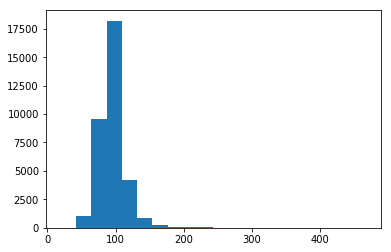

In [24]:
import matplotlib.pyplot as plt

plt.hist(movie_length.length, bins=20)
plt.show()

### Year

In [25]:
idx_movie_basics[idx_movie_basics.startYear == '\\N']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt1082098,movie,Spring Break '83,Spring Break '83,0,\N,\N,\N,Comedy


In [26]:
movie_year = idx_movie_basics[idx_movie_basics.startYear != '\\N'].startYear.astype(float).astype(int)

In [27]:
movie_year.describe()

count    34265.000000
mean     1985.635576 
std      27.456396   
min      1897.000000 
25%      1964.000000 
50%      1994.000000 
75%      2010.000000 
max      2018.000000 
Name: startYear, dtype: float64

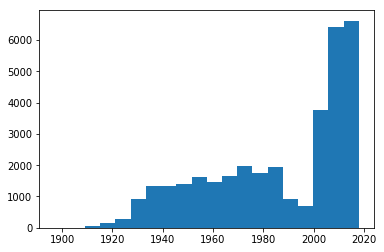

In [28]:
plt.hist(movie_year, bins=20)
plt.show()

### Genres - One Hot Encoding (OHE)

In [29]:
idx_movie_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,\N,20.0,"Documentary,News,Sport"
tt0001892,movie,Den sorte drøm,Den sorte drøm,0,1911.0,\N,53.0,Drama
tt0002101,movie,Cleopatra,Cleopatra,0,1912.0,\N,100.0,"Drama,History"
tt0002130,movie,Dante's Inferno,L'Inferno,0,1911.0,\N,68.0,"Adventure,Drama,Fantasy"
tt0002199,movie,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",0,1912.0,\N,60.0,"Biography,Drama"


In [30]:
genres = (idx_movie_basics
    .genres
    .str.split(',', expand=True)
    .stack()
    .reset_index()
    .pivot_table(index=['tconst'], columns=0, fill_value=0, aggfunc='size'))

In [31]:
genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
tconst,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000147,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
tt0001892,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0002101,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0002130,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0002199,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0002844,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0003037,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0003165,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
tt0003167,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Bacon index

#### Actor edges

In [32]:
actors = set(idx_crew_basics[
    idx_crew_basics.primaryProfession.str.contains('actor') 
    | idx_crew_basics.primaryProfession.str.contains('actress')].index)

In [33]:
def get_actor_tuples(cast):
    cast_actors = [member for member in cast.split(',') if member in actors]
    return [(actor1, actor2) for actor1 in cast_actors for actor2 in cast_actors if actor1 != actor2]

actor_tuples = idx_principals.principalCast.transform(get_actor_tuples)

actor_edges = [edge 
    for edge_list in actor_tuples 
    for edge in edge_list]

actor_edges_bidirectional = list(set(actor_edges + [(y, x) for x, y in actor_edges]))

#### Encode actor ids to integers

In [34]:
actors_enumerated = list(enumerate(actors))

int_to_actor = dict(actors_enumerated)
actor_to_int = dict([(y, x) for x, y in actors_enumerated])

actor_edges_int = [(actor_to_int[x], actor_to_int[y]) for x, y in actor_edges_bidirectional]

#### Igraph and Bacon index

In [35]:
from igraph import Graph

actors_graph = Graph(actor_edges_int)

In [36]:
bacon_id = actor_to_int[
    idx_crew_basics[
        idx_crew_basics
            .primaryName
            .str
            .contains('Kevin Bacon')]
    .index
    .values[0]]

In [37]:
paths_to_bacon = Graph.get_shortest_paths(actors_graph, bacon_id)

non_empty_paths = list(filter(lambda x: x != [], paths_to_bacon))

id_to_bacon_index = dict(zip(map(lambda x: x[-1], non_empty_paths), map(len, non_empty_paths)))

In [38]:
def get_bacon_index(crew):
    return [crew, id_to_bacon_index.get(actor_to_int.get(crew, -1), 1000)]

crew_to_bacon_index = dict(crew_basics.nconst.transform(get_bacon_index).tolist())

In [39]:
bacon_index = pd.DataFrame(idx_principals
        .principalCast
        .str.split(',')
        .transform(lambda x: min(map(lambda y: crew_to_bacon_index[y], x)))
        .rename('bacon_index'))

In [40]:
bacon_index.bacon_index.describe()

count    56303.000000
mean     89.021722   
std      279.280845  
min      1.000000    
25%      3.000000    
50%      3.000000    
75%      4.000000    
max      1000.000000 
Name: bacon_index, dtype: float64

In [41]:
bacon_index[bacon_index.bacon_index == 1000].shape[0] / float(bacon_index.shape[0])

0.08591016464486795

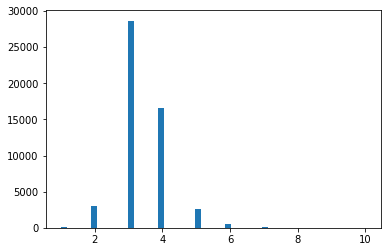

In [42]:
import matplotlib.pyplot as plt

plt.hist(bacon_index[bacon_index.bacon_index < 1000].bacon_index, bins=50)
plt.show()

## Merge Features

In [43]:
all_features_and_labels = pd.concat([movie_length, movie_year, genres, bacon_index, idx_ratings[['averageRating']]], axis=1, join='inner')

In [44]:
all_features_and_labels.shape

(34259, 29)

In [45]:
all_features_and_labels.head()

,length,startYear,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,\N,bacon_index,averageRating
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000147,20,1897,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4,5.2
tt0001892,53,1911,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6.3
tt0002101,100,1912,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5.2
tt0002130,68,1911,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,7.1
tt0002199,60,1912,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5.8


## Let's give it a run

In [46]:
features = all_features_and_labels.drop('averageRating', axis=1)
labels = all_features_and_labels['averageRating'].astype(int)


Selecting regularization parameter...
Using hyperparameter=10
Evaluating model on 10 folds...



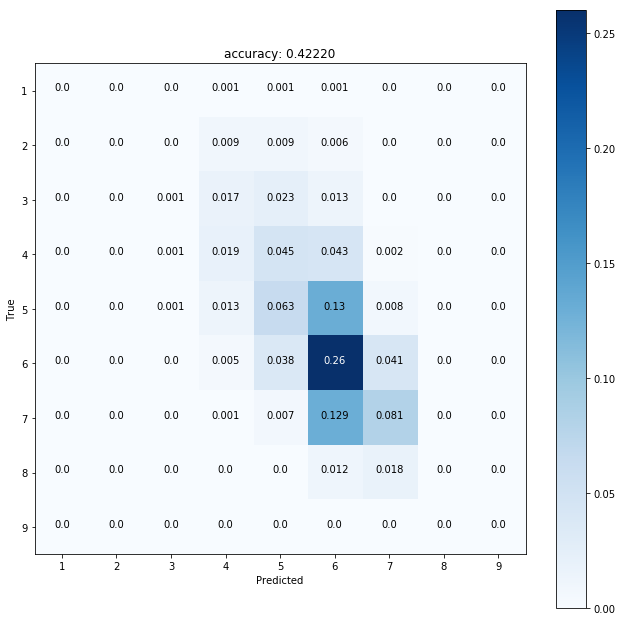

In [47]:
hyperparametrized_model = simple_classification_performance(
    features, 
    labels,  
    model_name='random_forest', 
    n_folds=10,
    n_estimators=200,
    grid={'max_depth': [10]},
    run_grid_search=False)